## Imports

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import wilcoxon
from scipy import stats

## FTS data

Read FTS csv data.

In [2]:
fts_data = pd.read_csv("../data/raw/FTS_Complete.csv", dtype='unicode')

Remove unneeded columns.

In [3]:
fts_data_simplified = fts_data.drop(["Flow ID",
"Original amount",
"Description",
"Source Emergency",
"Source Project",
"Source Plan",
"Destination Plan",
"Destination Emergency",
"Destination Project",
"Linked parent ID",
"Linked child ID",
"Donor project code",
"Modality",
"Version ID",
"Exchange rate",
"Original currency",
"Amount shared on boundary (USD)"], axis=1)

Only keep donations that went to Yemen,

In [4]:
fts_data_simplified_destinLocYE = fts_data_simplified.loc[fts_data_simplified['Destination Location'] == "Yemen"]

The scope of the study defines the time frame as 2014-2017. 

In [5]:
years = ("2014", "2015", "2016", "2017")

In [6]:
fts_data_simplified_destinLocYE_14_17 = fts_data_simplified_destinLocYE.loc[fts_data_simplified_destinLocYE['Destination Usage year'].isin(years)]

Only select actual 'Paid Contributions', not 'Commitments' or 'Pledges'.

In [7]:
fts_data_simplified_destinLocYE_14_17_paidDistribu = fts_data_simplified_destinLocYE_14_17.loc[fts_data_simplified_destinLocYE_14_17['Flow status'] == "Paid Contribution"]

Insert a column used for recoding the recipient organizations. This is needed because sometimes organizations have different names within FTS.

In [8]:
fts_data_simplified_destinLocYE_14_17_paidDistribu.insert(11, 'DestinOrgCode', '')

Code the organizations within the FTS data.

In [9]:
fts_data_simplified_destinLocYE_14_17_paidDistribu.fillna(method='ffill')

def coding_orgs(org_name):
    if org_name == 'United Nations Development Programme':
        return "1"
    elif org_name == 'Action Contre la Faim':
        return "2"
    elif org_name == 'Adventist Development and Relief Agency':
        return "3"
    elif org_name == 'Agency for Technical Cooperation and Development':
        return "4"
    elif org_name == 'Al Khair Relief Development Foundation':
        return "5"
    elif org_name == 'Al-Badyah Charitable Foundation':
        return "6"
    elif org_name == 'Al-Baida Coalition for Relief and Humanitarian Actions':
        return "7"
    elif org_name == 'Benevolence Coalition For Humanitarian Relief':
        return "8"
    elif org_name == 'The Coalition Of Humanitarian Relief':
        return "8"
    elif org_name == 'International Committee of the Red Cross':
        return "10"
    elif org_name == 'International Federation of Red Cross and Red Crescent Societies':
        return "10"
    elif org_name == 'Norwegian Red Cross':
        return "10"
    elif org_name == 'Qatar Red Crescent Society':
        return "10"
    elif org_name == 'Red Crescent Society of the United Arab Emirates':
        return "10"
    elif org_name == 'Sudanese Red Crescent':
        return "10"
    elif org_name == 'Yemen Red Crescent Society':
        return "10"
    elif org_name == 'Kuwait Red Crescent Society':
        return "10"
    elif org_name == 'CARE International':
        return "11"
    elif org_name == 'Yemen Humanitarian Fund':
        return "12"
    elif org_name == 'M├®decins sans Fronti─ìres':
        return "18"
    elif org_name == 'Enjaz foundation for development':
        return "21"
    elif org_name == 'Food & Agriculture Organization of the United Nations':
        return "26"
    elif org_name == 'Global Communities':
        return "28"
    elif org_name == 'Yemen, Government of':
        return "30"
    elif org_name == 'Handicap International / Humanity & Inclusion':
        return "32"
    elif org_name == 'Yemen Higher Relief Committee':
        return "33"
    elif org_name == 'International Commission for Human Development':
        return "37"
    elif org_name == 'International Medical Corps':
        return "38"
    elif org_name == 'International Organization for Migration':
        return "40"
    elif org_name == 'International Rescue Committee':
        return "42"
    elif org_name == 'International Islamic Relief Organization':
        return "44"
    elif org_name == 'Islamic Relief Worldwide':
        return "44"
    elif org_name == 'Khalifa Bin Zayed Al Nahyan Foundation':
        return "45"
    elif org_name == 'Mercy Corps':
        return "49"
    elif org_name == 'Norwegian Refugee Council':
        return "53"
    elif org_name == 'Office for the Coordination of Humanitarian Affairs':
        return "54"
    elif org_name == 'OXFAM GB':
        return "59"
    elif org_name == 'OXFAM Ireland':
        return "59"
    elif org_name == 'World Food Programme':
        return "64"
    elif org_name == 'Save the Children':
        return "68"
    elif org_name == 'Scoop Group':
        return "72"
    elif org_name == 'United Nations High Commissioner for Refugees':
        return "78"
    elif org_name == 'United Nations Population Fund':
        return "79"
    elif org_name == 'United Nations Children\'s Fund':
        return "80"
    elif org_name == 'World Health Organization':
        return "85"
    elif org_name == 'Yemeni Social Reform Society':
        return "87"
    elif org_name == 'Alawn Foundation for Development':
        return "93"
    elif org_name == 'AlBasar Foundation':
        return "94"
    elif org_name == 'Alyateem Development Foundation':
        return "95"
    elif org_name == 'Direct Aid':
        return "96"
    elif org_name == 'International Campaign to Abolish Nuclear Weapons (ICAN)':
        return "97"
    elif org_name == 'International Children\'s Action Network':
        return "98"
    elif org_name == 'International Youth Council - Yemen':
        return "99"
    elif org_name == 'Japan Platform':
        return "100"
    elif org_name == 'Japanese NGOs':
        return "101"
    elif org_name == 'Kuwaiti Yemeni Relief':
        return "102"
    elif org_name == 'NGOs (details not yet provided)':
        return "91"
    elif org_name == 'Office of the High Commissioner for Human Rights':
        return "103"
    elif org_name == 'Physicians Across Continents':
        return "104"
    elif org_name == 'Private (individuals & organizations)':
        return "63"
    elif org_name == 'Reform Society':
        return "87"
    elif org_name == 'United Nations Office on Drugs and Crime':
        return "105"
    elif org_name == 'Wethaq Foundation for Civil Orientation':
        return "106"
    elif org_name == 'World Assembly of Muslim Youth':
        return "107"
    elif org_name == 'Yemen National Committee for Human Rights':
        return "108"
    elif org_name == 'Yemeni Association for relief and development':
        return "109"
    
fts_data_simplified_destinLocYE_14_17_paidDistribu['DestinOrgCode'] = fts_data_simplified_destinLocYE_14_17_paidDistribu['Destination Organization'].apply(coding_orgs)

C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:137: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Convert donation amounts into numeric data types.

In [10]:
fts_data_simplified_destinLocYE_14_17_paidDistribu["Amount (USD)"] = pd.to_numeric(fts_data_simplified_destinLocYE_14_17_paidDistribu["Amount (USD)"])

C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The EU as a donor is only listed in the 'Source Organization' column, not in the 'Source Location' column like all other major donors. Therefor we recode it here.

In [11]:
for key, row in fts_data_simplified_destinLocYE_14_17_paidDistribu.iterrows():
    if fts_data_simplified_destinLocYE_14_17_paidDistribu.loc[key,'Source Organization'] == 'European Commission' :
        fts_data_simplified_destinLocYE_14_17_paidDistribu.loc[key,'Source Location'] = 'EU Institutions'
    if fts_data_simplified_destinLocYE_14_17_paidDistribu.loc[key,'Source Organization'] == 'European Commission\'s Humanitarian Aid and Civil Protection Department' :
        fts_data_simplified_destinLocYE_14_17_paidDistribu.loc[key,'Source Location'] = 'EU Institutions'


C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a pivot table to aggregate donation amounts by donor, recipient organization and year.

In [12]:
fts_data_simplified_destinLocYE_14_17_paidDistribu_pivot = pd.pivot_table(fts_data_simplified_destinLocYE_14_17_paidDistribu,index=["Source Location","DestinOrgCode", "Destination Usage year"],values=["Amount (USD)"])

## OECD data

Read OECD csv data.

In [13]:
oecd_data = pd.read_csv("../data/raw/OECD_CompleteHumanitarian.csv", encoding='latin-1', dtype='unicode')

Remove unneeded columns.

In [14]:
oecd_data_simplified = oecd_data.drop(["AgencyCode",
"Aid_t",
"AssocFinance",
"Bi_Multi",
"Biodiversity",
"BudgetIdent",
"CRSid",
"CapitalExpend",
"Category",
"ChannelCode",
"ClimateAdaptation",
"ClimateMitigation",
"CommitmentDate",
"Commitment_National",
"CurrencyCode",
"Desertification",
"Disbursement_National",
"Environment",
"ExpectedStartDate",
"FTC",
"Finance_t",
"FlowCode",
"Gender",
"Geography",
"GrantElement",
"GrantEquiv",
"IncomegroupCode",
"IncomegroupName",
"InitialReport",
"Interest1",
"Interest2",
"InvestmentProject",
"NumberRepayment",
"PBA",
"ParentChannelCode",
"Pdgg",
"ProjectNumber",
"ProjectTitle",
"PurposeName",
"RMNCH",
"RecipientCode",
"RegionCode",
"RegionName",
"Repaydate1",
"Repaydate2",
"SectorCode",
"Trade",
"TypeRepayment",
"USD_Adjustment",
"USD_Adjustment_Defl",
"USD_AmountPartialTied",
"USD_AmountPartialTied_Defl",
"USD_AmountTied",
"USD_AmountUntied",
"USD_AmountUntied_Defl",
"USD_Amounttied_Defl",
"USD_Arrears_Interest",
"USD_Arrears_Principal",
"USD_Commitment",
"USD_Commitment_Defl",
"USD_Disbursement_Defl",
"USD_Expert_Commitment",
"USD_Expert_Extended",
"USD_Export_Credit",
"USD_Future_DS_Interest",
"USD_Future_DS_Principal",
"USD_GrantEquiv",
"USD_IRTC",
"USD_Interest",
"USD_Outstanding",
"USD_Received",
"USD_Received_Defl",
"@_id"
], axis=1)

Only keep donations that went to Yemen.

In [15]:
oecd_data_simplified_recipientNameYE = oecd_data_simplified.loc[oecd_data_simplified['RecipientName'] == "Yemen"]

The scope of the study defines the time frame as 2014-2017.

In [16]:
years = ("2014", "2015", "2016", "2017")

In [17]:
oecd_data_simplified_recipientNameYE_14_17 = oecd_data_simplified_recipientNameYE.loc[oecd_data_simplified_recipientNameYE['Year'].isin(years)]

Insert two columns used for recoding the recipient organizations. This is needed because sometimes organizations have different names within OECD.

In [18]:
oecd_data_simplified_recipientNameYE_14_17.insert(2, 'ChannelNameCode', '')

In [19]:
oecd_data_simplified_recipientNameYE_14_17.insert(4, 'ChannelReportedNameCode', '')

Code the organizations within the OECD data.

In [20]:
def coding_orgs(org_name):
    if org_name == '03474 - UNDP (Direct Execution)':
        return "1"
    elif org_name == '99999 - UNDP':
        return "1"
    elif org_name == 'UNDP':
        return "1"
    elif org_name == 'UNDP(United Nations Development Programme)':
        return "1"
    elif org_name == 'United Nations Development Programme':
        return "1"
    elif org_name == 'ACF - Action Against Hunger - France':
        return "2"
    elif org_name == 'ACF International':
        return "2"
    elif org_name == 'ACF/ACTION CONTRE LA FAIM FRANCE':
        return "2"
    elif org_name == 'Action Against Hunger (ACF) - France':
        return "2"
    elif org_name == 'Adventist Development and Relief Agency':
        return "3"
    elif org_name == 'Adventist Development and Relief Agency International':
        return "3"
    elif org_name == 'Agency for Technical Cooperation and Development':
        return "4"
    elif org_name == 'Al - Khair Coalition for Humanitarian Relief':
        return "5"
    elif org_name == 'Al-Badiyh Charitable Foundation':
        return "6"
    elif org_name == 'Al-Baida Coalition for Relief and Humanitarian Actions':
        return "7"
    elif org_name == 'Benevolence Coalition For Humanitarian Relief':
        return "8"
    elif org_name == 'Bollor?Group':
        return "9"
    elif org_name == 'Canadian Red Cross':
        return "10"
    elif org_name == 'Comit?international de la Croix-Rouge':
        return "10"
    elif org_name == 'Dansk R?de Kors':
        return "10"
    elif org_name == 'Emirates Red Crescent':
        return "10"
    elif org_name == 'Finnish Red Cross':
        return "10"
    elif org_name == 'ICRC':
        return "10"
    elif org_name == 'ICRC - International Committee of the Red Cross':
        return "10"
    elif org_name == 'ICRC - Switzerland':
        return "10"
    elif org_name == 'ICRC(International Committee of the Red Cross)':
        return "10"
    elif org_name == 'ICRC/INTERNATIONAL COMMITTEE OF THE RED CROSS':
        return "10"
    elif org_name == 'International Committee Of The Red Cross':
        return "10"
    elif org_name == 'ICRC/INTERNATIONAL COMMITTEE OF THE RED CROSS/R?A KORSET':
        return "10"
    elif org_name == 'INGO International Committee of the Red Cross ICRC - ICRC - PRT':
        return "10"
    elif org_name == 'International Committee of the Red Cross':
        return "10"
    elif org_name == 'International Committee of the Red Cross (ICRC)':
        return "10"
    elif org_name == 'International Committee of the Red Cross?ICRC)':
        return "10"
    elif org_name == 'International Federation of Red Cross and Red Crescent Societies':
        return "10"
    elif org_name == 'International Red Cross and Red Crescent Societies (ICRC)':
        return "10"
    elif org_name == 'NGO Rode Kruis-Vlaanderen Internationaal':
        return "10"
    elif org_name == 'Norges R?de Kors':
        return "10"
    elif org_name == 'Swedish Red Cross':
        return "10"
    elif org_name == 'CARE Canada':
        return "11"
    elif org_name == 'Care International':
        return "11"
    elif org_name == 'CBPFs(Country-Based Pooled Funds)':
        return "12"
    elif org_name == 'Central Emergency Response Fund':
        return "12"
    elif org_name == 'ERF(Emergency Reponse Fund)':
        return "12"
    elif org_name == 'ERF(Emergency Response Fund)':
        return "12"
    elif org_name == 'UN-led Country-based Pooled Funds':
        return "12"
    elif org_name == 'UNOCHA (Emergency Response Fund)':
        return "12"
    elif org_name == 'Central Government':
        return "0"
    elif org_name == 'Cooperative for Assistance and Relief Everywhere':
        return "15"
    elif org_name == 'Dansk Flygtningehj?lp':
        return "16"
    elif org_name == 'Flyktninghjelpen':
        return "16"
    elif org_name == 'Developing country-based NGO':
        return "0"
    elif org_name == 'Doctors Without Borders':
        return "19"
    elif org_name == 'Donor country-based NGO':
        return "0"
    elif org_name == 'ONG bas? dans un pays donneur':
        return "0"
    elif org_name == 'Donor Government':
        return "0"
    elif org_name == 'Enjaz development foundation':
        return "21"
    elif org_name == 'Enterprise - Non United States Other':
        return "0"
    elif org_name == 'Enterprise - United States Other':
        return "0"
    elif org_name == 'Estonian Rescue Board':
        return "25"
    elif org_name == 'FAO':
        return "26"
    elif org_name == 'Food and Agricultural Organisation':
        return "26"
    elif org_name == 'GIZ':
        return "27"
    elif org_name == 'Global Communities':
        return "28"
    elif org_name == 'Government of the United Arab Emirates':
        return "0"
    elif org_name == 'Government of Yemen':
        return "0"
    elif org_name == 'REPUBLIC OF YEMEN':
        return "0"
    elif org_name == 'Yemen Government':
        return "0"
    elif org_name == 'Governorate in Yemen':
        return "0"
    elif org_name == 'Handicap International Canada':
        return "32"
    elif org_name == 'High relief committee (Republic of yemen)':
        return "33"
    elif org_name == 'ILO':
        return "34"
    elif org_name == 'International Labour Organisation - Regular Budget Supplementary Account':
        return "34"
    elif org_name == 'Information Management and Mine Action Programs':
        return "35"
    elif org_name == 'International Business and Technical Consultants Inc.':
        return "36"
    elif org_name == 'International Commission for Human Development':
        return "37"
    elif org_name == 'International Medical Corps':
        return "38"
    elif org_name == 'International NGO':
        return "0"
    elif org_name == 'ONG INTERNATIONALE':
        return "0"
    elif org_name == 'International Organisation for Migration':
        return "40"
    elif org_name == 'International Organisation for Migration (IOM)':
        return "40"
    elif org_name == 'International Organization for Migration':
        return "40"
    elif org_name == 'IOM':
        return "40"
    elif org_name == 'IOM - International Organisation for Migration/Organizzazione internazionale per l emigrazione':
        return "40"
    elif org_name == 'IOM(International Organisation for Migration )':
        return "40"
    elif org_name == 'IOM(International Organisation for Migration)':
        return "40"
    elif org_name == 'IOM(International Organization for Migration)':
        return "40"
    elif org_name == 'IOM/INTERNATIONAL ORGANIZATION FOR MIGRATION':
        return "40"
    elif org_name == 'International Relief and Development':
        return "41"
    elif org_name == 'International Rescue Committee':
        return "42"
    elif org_name == 'IRC/INTERNATIONAL RESCUE COMMITTEE':
        return "42"
    elif org_name == 'INTERSOS':
        return "43"
    elif org_name == 'ISLAMIC RELIEF':
        return "44"
    elif org_name == 'Islamic Relief Canada':
        return "44"
    elif org_name == 'Islamic Relief Sweden':
        return "44"
    elif org_name == 'Islamic Relief Worldwide':
        return "44"
    elif org_name == 'khalifa Bin Zayed Al Nahyan Foundation':
        return "45"
    elif org_name == 'King Salman for Relief and Humanitarian Aid Center':
        return "46"
    elif org_name == 'KOICA':
        return "47"
    elif org_name == 'Matrix International Logistics Inc.':
        return "48"
    elif org_name == 'Mercy Corps':
        return "49"
    elif org_name == 'Multilateral Organisations':
        return "0"
    elif org_name == 'Network':
        return "0"
    elif org_name == 'Networks':
        return "0"
    elif org_name == 'Non-Governmental Organisation (NGO) and Civil Society':
        return "0"
    elif org_name == 'NON-GOVERNMENTAL ORGANISATIONS (NGOs) AND CIVIL SOCIETY':
        return "0"
    elif org_name == 'Norwegian Refugee Council':
        return "53"
    elif org_name == 'NRC/NORWEGIAN REFUGEE COUNCIL':
        return "53"
    elif org_name == 'OCHA - Office for the Coordination of Humanitarian Affairs':
        return "54"
    elif org_name == 'OCHA - United Nations Office for the Coordination of Humanitarian Affairs':
        return "54"
    elif org_name == 'Un Ocha':
        return "54"
    elif org_name == 'UN Office for the Coordination of Humanitarian Aff':
        return "54"
    elif org_name == 'UN UNOCHA - Office of Co-ordination of Humanitarian Affairs - PRT':
        return "54"
    elif org_name == 'United Nations Office of Co-ordination of Humanitarian Affairs':
        return "54"
    elif org_name == 'United Nations Office of Co-ordination of Humanitarian Affairs (UNOCHA)':
        return "54"
    elif org_name == 'United nations Office of co-ordination of Humanitarian Affairs':
        return "54"
    elif org_name == 'UNOCHA':
        return "54"
    elif org_name == 'UN OCHA':
        return "54"
    elif org_name == 'UNOCHA - Switzerland':
        return "54"
    elif org_name == 'UNOCHA - UN Office of Co-ordination of Humanitarian Affairs':
        return "54"
    elif org_name == 'UNOCHA office in Yemen':
        return "54"
    elif org_name == 'UNOCHA/UNITED NATIONS OFFICE FOR THE COORDINATION OF HUMANITARIAN AFFAIRS':
        return "54"
    elif org_name == 'Other':
        return "0"
    elif org_name == 'Other non-financial corporations':
        return "0"
    elif org_name == 'Other public entities in donor country':
        return "0"
    elif org_name == 'Other public entities in recipient country':
        return "0"
    elif org_name == 'Oxfam':
        return "59"
    elif org_name == 'OXFAM - provider country office':
        return "59"
    elif org_name == 'Oxfam Deutschland e. V. (OXFAM - provider country office)':
        return "59"
    elif org_name == 'OXFAM International':
        return "59"
    elif org_name == 'Oxfam-Qu?ec':
        return "59"
    elif org_name == 'Private sector in provider country':
        return "0"
    elif org_name == 'Private sector in recipient country':
        return "0"
    elif org_name == 'Private sector in third country':
        return "0"
    elif org_name == 'Private sector institution':
        return "0"
    elif org_name == 'Private Sector Institutions':
        return "0"
    elif org_name == 'Programme alimentaire mondial':
        return "64"
    elif org_name == 'UN WFP - UNHAS Humanitarian Air Service - PRT':
        return "64"
    elif org_name == 'UN World Food Programme WFP_PAM - WFP - PRT':
        return "64"
    elif org_name == 'United Nations World Food Programme (UN WFP)':
        return "64"
    elif org_name == 'United Nations World Food Programme (WFP)':
        return "64"
    elif org_name == 'WFP':
        return "64"
    elif org_name == 'WFP - World Food Programme':
        return "64"
    elif org_name == 'WFP(World Food Programme)':
        return "64"
    elif org_name == 'WFP/WORLD FOOD PROGRAMME':
        return "64"
    elif org_name == 'World Food Programme':
        return "64"
    elif org_name == 'WFP - WORLD FOOD PROGRAMME':
        return "64"
    elif org_name == 'World Food programme (WFP)':
        return "64"
    elif org_name == 'World Food Programme (WFP)':
        return "64"
    elif org_name == 'Public corporations':
        return "0"
    elif org_name == 'Public-Private Partnerships (PPP)':
        return "0"
    elif org_name == 'Recipient Government':
        return "0"
    elif org_name == 'Red Barnet':
        return "68"
    elif org_name == 'Save the Children':
        return "68"
    elif org_name == 'Save the Children - donor country office':
        return "68"
    elif org_name == 'Save the Children Canada':
        return "68"
    elif org_name == 'Save the Children Deutschland e. V. (provider country office)':
        return "68"
    elif org_name == 'Save the Children Federation Inc.':
        return "68"
    elif org_name == 'Relief Coalition in Aden':
        return "69"
    elif org_name == 'SANA\'A MUNICIPALITY':
        return "0"
    elif org_name == 'Scoop group':
        return "72"
    elif org_name == 'Socotra Development Association':
        return "73"
    elif org_name == 'Solidarios sin Fronteras':
        return "74"
    elif org_name == 'SVENSKA MISSIONSR?DET':
        return "75"
    elif org_name == 'Third Country Government (Delegated co-operation)':
        return "0"
    elif org_name == 'UN Office of the High Commissioner for Refugees UNHCR_HCR - UNHCR - PRT':
        return "78"
    elif org_name == 'UNHCR':
        return "78"
    elif org_name == 'UNHCR - U.N. Office of the United Nations High Commissioner for Refugees':
        return "78"
    elif org_name == 'UNHCR - UN Office of the UN High Commissioner for Refugees':
        return "78"
    elif org_name == 'UNHCR - United Nations High Commissioner for Refugees':
        return "78"
    elif org_name == 'UNHCR(United Nations Office of the United Nations High Commissioner for Refugees)':
        return "78"
    elif org_name == 'UNHCR/UNITED NATIONS HIGH COMMISSIONER FOR REFUGEES':
        return "78"
    elif org_name == 'United Nations Office of the United Nations High Commissioner for Refugees':
        return "78"
    elif org_name == 'United Nations Office of the United Nations High Commissioner for Refugees (UNHCR)':
        return "78"
    elif org_name == 'UNFPA':
        return "79"
    elif org_name == 'UNFPA - United Nations Population Fund':
        return "79"
    elif org_name == 'United Nations Population Fund':
        return "79"
    elif org_name == 'UNICEF':
        return "80"
    elif org_name == 'UNICEF - UNITED NATIONS CHILDREN S FUND':
        return "80"
    elif org_name == 'UNICEF - Childrens Fund - PRT':
        return "80"
    elif org_name == 'UNICEF - United Nations Children s Fund':
        return "80"
    elif org_name == 'UNICEF - United Nations Children\'s Fund':
        return "80"
    elif org_name == 'UNICEF(United Nations Children`s Fund)':
        return "80"
    elif org_name == 'UNICEF(United Nations Children\'s Fund)':
        return "80"
    elif org_name == 'UNICEF/UNITED NATIONS CHILDRENS FUND':
        return "80"
    elif org_name == 'United Nations Children?s Fund':
        return "80"
    elif org_name == 'United Nations Childrens Fund':
        return "80"
    elif org_name == 'United Nations Children\'s Fund':
        return "80"
    elif org_name == 'United Nations Children\'s Fund (UNICEF)':
        return "80"
    elif org_name == 'United Nations Office for Project Services':
        return "81"
    elif org_name == 'University college or other teaching institution research institute or think?tank':
        return "0"
    elif org_name == 'University college or other teaching institution research institute or think-tank':
        return "0"
    elif org_name == 'Unspecified Vendors - Bosnia and Herzegovina':
        return "0"
    elif org_name == 'Watan Foundation':
        return "84"
    elif org_name == 'WHO - World Health Organization':
        return "85"
    elif org_name == 'WHO(World Health Organization)':
        return "85"
    elif org_name == 'World Health Organisation - assessed contributions':
        return "85"
    elif org_name == 'World Health Organisation - core voluntary contributions account':
        return "85"
    elif org_name == 'World Health Organisation (WHO)':
        return "85"
    elif org_name == 'World Health Organization':
        return "85"
    elif org_name == 'World Health Organization (WHO)':
        return "85"
    elif org_name == 'Yemen Development Network for NGOs':
        return "86"
    elif org_name == 'Yemeni Development Network For NGOs':
        return "86"
    elif org_name == 'Yemeni Social Reform Society':
        return "87"
    elif org_name == 'MSB/MYNDIGHETEN F? SAMH?LLSSKYDD & BEREDSKAP':
        return "88"
    elif org_name == 'United Nations (UN) agency fund or commission':
        return "0"
    elif org_name == 'United Nations agency fund or commission (UN)':
        return "0"
    elif org_name == 'Personal Services Contractors - USAID':
        return "0"
    elif org_name == 'NGO-s':
        return "0"
    elif org_name == '03469 - National Execution':
        return "0"
    else: 
        return "0"
    
oecd_data_simplified_recipientNameYE_14_17['ChannelNameCode'] = oecd_data_simplified_recipientNameYE_14_17['ChannelName'].apply(coding_orgs)
oecd_data_simplified_recipientNameYE_14_17['ChannelReportedNameCode'] = oecd_data_simplified_recipientNameYE_14_17['ChannelReportedName'].apply(coding_orgs)


C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:423: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:424: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As we now have two colums with coded organizations, we need one that combines both.

In [21]:
oecd_data_simplified_recipientNameYE_14_17.insert(5, 'CodedOrg', '')

In [22]:
oecd_data_simplified_recipientNameYE_14_17['CodedOrg'] = '0'

C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
for key, row in oecd_data_simplified_recipientNameYE_14_17.iterrows():
    if row['ChannelNameCode'] != '0':
        row['CodedOrg'] = row['ChannelNameCode']
    if row['ChannelReportedNameCode'] != '0':
        row['CodedOrg'] = row['ChannelReportedNameCode']


Remove some erroneous data that Excel inserted into the CSV.

In [24]:
oecd_data_simplified_recipientNameYE_14_17["USD_Disbursement"]= oecd_data_simplified_recipientNameYE_14_17["USD_Disbursement"].replace('#NULL!', '0') 

C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Convert donation amounts into numeric data types.

In [25]:
oecd_data_simplified_recipientNameYE_14_17["USD_Disbursement"] = pd.to_numeric(oecd_data_simplified_recipientNameYE_14_17["USD_Disbursement"])

C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Within the OECD data, amounts are reported as 1/1000000. To make OECD amounts comparable with FTS amounts we multiply OECD amounts by 1000000.

In [26]:
oecd_data_simplified_recipientNameYE_14_17["USD_Disbursement"] = oecd_data_simplified_recipientNameYE_14_17["USD_Disbursement"] *1000000

C:\Users\dpaulus\AppData\Local\Continuum\miniconda3\envs\redcar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a pivot table to aggregate donation amounts by donor, recipient organization and year.

In [27]:
oecd_data_simplified_recipientNameYE_14_17_pivot = pd.pivot_table(oecd_data_simplified_recipientNameYE_14_17,index=["DonorName","CodedOrg", "Year"],values=["USD_Disbursement"])

## Merge FTS and OECD data

Turn FTS and OECD pivot tables into dataframes.

In [95]:
oecd_data_simplified_recipientNameYE_14_17_pivotToDF = pd.DataFrame(oecd_data_simplified_recipientNameYE_14_17_pivot.to_records())

In [96]:
fts_data_simplified_destinLocYE_14_17_paidDistribu_pivotToDF = pd.DataFrame(fts_data_simplified_destinLocYE_14_17_paidDistribu_pivot.to_records())

Rename columns to make merging easier.

In [97]:
fts_data_simplified_destinLocYE_14_17_paidDistribu_pivotToDF = fts_data_simplified_destinLocYE_14_17_paidDistribu_pivotToDF.rename(columns={"Source Location": "Donor", "DestinOrgCode": "Organization", 'Destination Usage year': 'Year', 'Amount (USD)': 'FTS_Amount'})

In [98]:
oecd_data_simplified_recipientNameYE_14_17_pivotToDF = oecd_data_simplified_recipientNameYE_14_17_pivotToDF.rename(columns={"DonorName": "Donor", "CodedOrg": "Organization", 'Year': 'Year', 'USD_Disbursement': 'OECD_Amount'})

Merge the two dataframes into one.

In [99]:
oecd_fts_merge = oecd_data_simplified_recipientNameYE_14_17_pivotToDF.merge(fts_data_simplified_destinLocYE_14_17_paidDistribu_pivotToDF, how='outer', on=['Donor', 'Organization', 'Year'])

## Grand Bargain signatories

Only select Grand Bargain signatory donors and organizations in the merged data.

In [100]:
GBSorgs = ('26', '10', '40', '80', '1', '78', '79', '54', '64')

In [101]:
GBSdonors = ('Australia', 'Belgium', 'Bulgaria', 'Canada', 'Czech Republic', 'Denmark', 'EU Institutions', 'Germany', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Sweden', 'Switzerland', 'United Kingdom', 'United States')

In [102]:
oecd_fts_merge_onlyGBSdonors = oecd_fts_merge.loc[oecd_fts_merge['Donor'].isin(GBSdonors)]

In [103]:
oecd_fts_merge_onlyGBSdonorsAndGBSorgs = oecd_fts_merge_onlyGBSdonors.loc[oecd_fts_merge_onlyGBSdonors['Organization'].isin(GBSorgs)]

## Descriptive statistics

Check the distribution of reported FTS and OECD amounts.

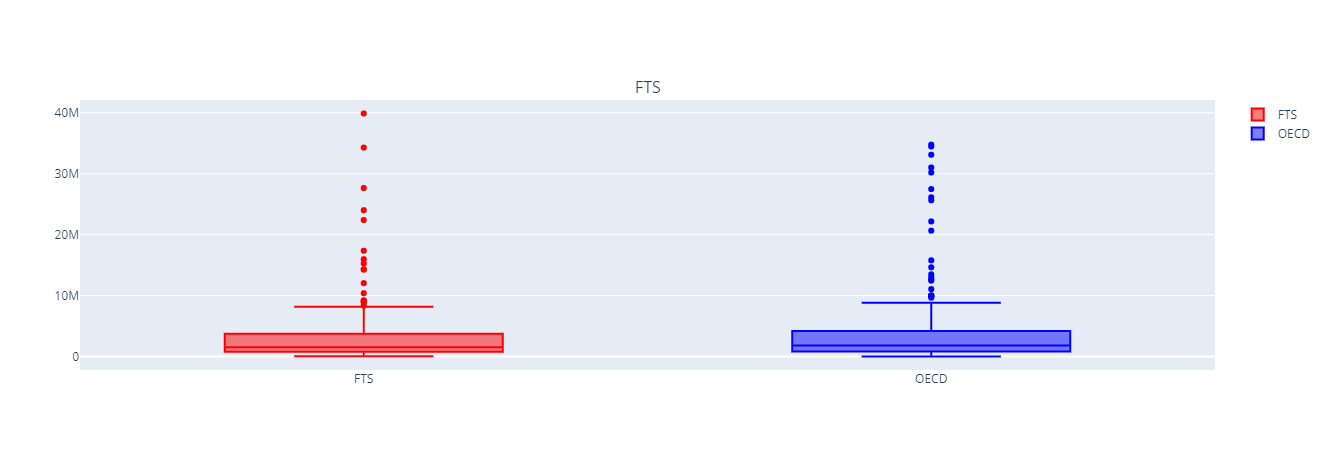

In [104]:
plot_FTSandOECD_amount_distribution = make_subplots(rows=1, cols=1, subplot_titles=("FTS", "OECD"))
plot_FTSandOECD_amount_distribution.add_trace(go.Box(y=oecd_fts_merge_onlyGBSdonorsAndGBSorgs['FTS_Amount'], name='FTS', marker_color = 'red'),
              row=1, col=1)
plot_FTSandOECD_amount_distribution.add_trace(go.Box(y=oecd_fts_merge_onlyGBSdonorsAndGBSorgs['OECD_Amount'], name='OECD', marker_color = 'blue'),
              row=1, col=1)
plot_FTSandOECD_amount_distribution.show()

## Remove outliers

Replace all NAs with 0s.

In [105]:
#Replace NAs with 0s.
oecd_fts_merge_onlyGBSdonorsAndGBSorgs = oecd_fts_merge_onlyGBSdonorsAndGBSorgs.fillna(0)

Create copy of merged dataframe, excluding outliers. 

In [110]:
oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers = oecd_fts_merge_onlyGBSdonorsAndGBSorgs[(np.abs(stats.zscore(oecd_fts_merge_onlyGBSdonorsAndGBSorgs['FTS_Amount'])) < 1.5)]

## Sums and Means of FTS and OECD data

Sums of all FTS and OECD amounts, per year.

In [111]:
oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_sums = oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers.groupby(['Year']).sum()

Means of all FTS and OECD amounts, per year.

In [112]:
oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_means = oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers.groupby(['Year']).mean()

Plot sums and means of FTS and OECD data

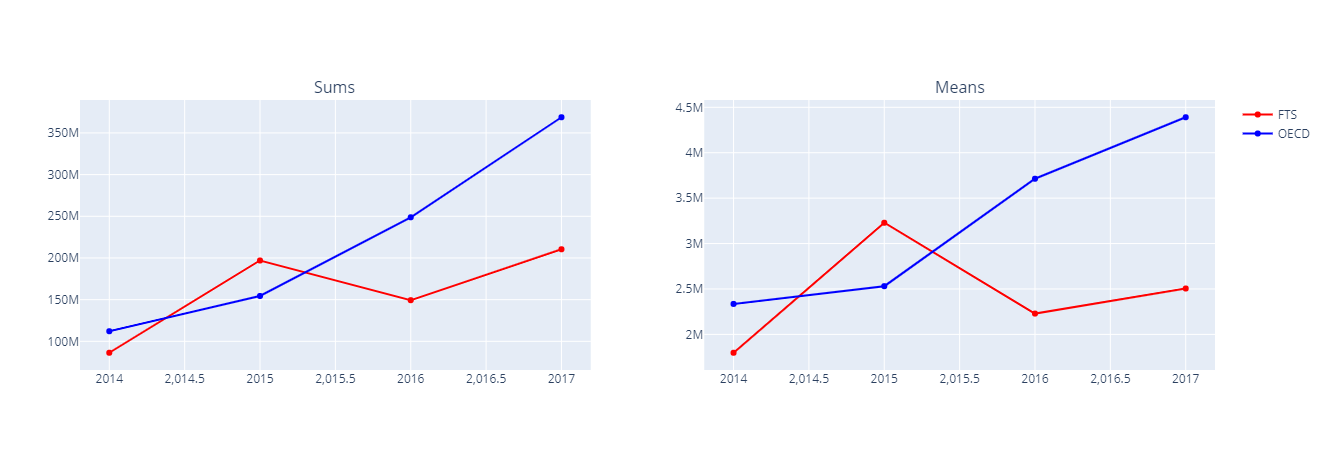

In [114]:
plot_meansAndsums = make_subplots(rows=1, cols=2,
    subplot_titles=("Sums", "Means"))

plot_meansAndsums.add_trace(go.Scatter(x=oecd_fts_merge_onlyGBSdonorsAndGBSorgs['Year'], y=oecd_fts_merge_onlyGBSdonorsAndGBSorgs_sums['FTS_Amount'],
                    mode='lines+markers',
                    name='FTS',
                    line=dict(color='red')), row=1, col=1)
plot_meansAndsums.add_trace(go.Scatter(x=oecd_fts_merge_onlyGBSdonorsAndGBSorgs['Year'], y=oecd_fts_merge_onlyGBSdonorsAndGBSorgs_sums['OECD_Amount'],
                    mode='lines+markers',
                    name='OECD',
                    line=dict(color='blue')), row=1, col=1)

plot_meansAndsums.add_trace(go.Scatter(x=oecd_fts_merge_onlyGBSdonorsAndGBSorgs['Year'], y=oecd_fts_merge_onlyGBSdonorsAndGBSorgs_means['FTS_Amount'],
                    mode='lines+markers',
                    name='FTS',
                    line=dict(color='red'),
                    showlegend=False), row=1, col=2)
plot_meansAndsums.add_trace(go.Scatter(x=oecd_fts_merge_onlyGBSdonorsAndGBSorgs['Year'], y=oecd_fts_merge_onlyGBSdonorsAndGBSorgs_means['OECD_Amount'],
                    mode='lines+markers',
                    name='OECD',
                    line=dict(color='blue'),
                    showlegend=False), row=1, col=2)

#plot_meansAndsums.write_html('first_figure.html', auto_open=True)
plot_meansAndsums.show()

## 2014-2015 vs. 2016-2017

Copy reported amounts from both timeframes into separate dataframes.

In [116]:
preGB = ('2014', '2015')
postGB = ('2016', '2017')

In [117]:
oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_preGB = oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers.loc[oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers['Year'].isin(preGB)]

In [118]:
oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_postGB = oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers.loc[oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers['Year'].isin(postGB)]

## Wilcoxon signed rank tests

For 2014-2015.

In [119]:
# compare samples
stat, p = wilcoxon(oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_preGB['FTS_Amount'], oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_preGB['OECD_Amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1787.000, p=0.024
Different distribution (reject H0)


For 2016-2017.

In [120]:
# compare samples
stat, p = wilcoxon(oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_postGB['FTS_Amount'], oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers_postGB['OECD_Amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=3337.000, p=0.001
Different distribution (reject H0)


For 2014-2017.

In [121]:
# compare samples
stat, p = wilcoxon(oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers['FTS_Amount'], oecd_fts_merge_onlyGBSdonorsAndGBSorgs_exclOutliers['OECD_Amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=10036.000, p=0.000
Different distribution (reject H0)


For 2014-2017, full sample, incl. outliers.

In [122]:
# compare samples
stat, p = wilcoxon(oecd_fts_merge_onlyGBSdonorsAndGBSorgs['FTS_Amount'], oecd_fts_merge_onlyGBSdonorsAndGBSorgs['OECD_Amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=11867.000, p=0.001
Different distribution (reject H0)


In [46]:
#Sum of FTS column
oecd_fts_merge_onlyGBSdonorsAndGBSorgs['FTS_Amount'].sum()

643026404.4166666

In [47]:
#Sum of OECD column
oecd_fts_merge_onlyGBSdonorsAndGBSorgs['OECD_Amount'].sum()

884081690.8464286